In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

folder = "/Users/mathildepro/Documents/code_projects/jetson_logs/20230731_095357"
stats = pd.read_csv(folder +"/tegrastats.csv")

In [7]:
csv_path = folder + 'tb.csv'
tb_df = pd.read_csv(csv_path)

In [46]:
tb_df["metric"] = tb_df["tag"].apply(lambda x: x.split("/")[0])
tb_df["phase"] = tb_df["tag"].apply(lambda x: x.split("/")[1])
tb_df[tb_df["phase"]=='train'].tag.unique()

array(['Accuracy/train', 'Duration/train', 'Loss/train', 'Time/train',
       'Timestamp/train'], dtype=object)

<Axes: >

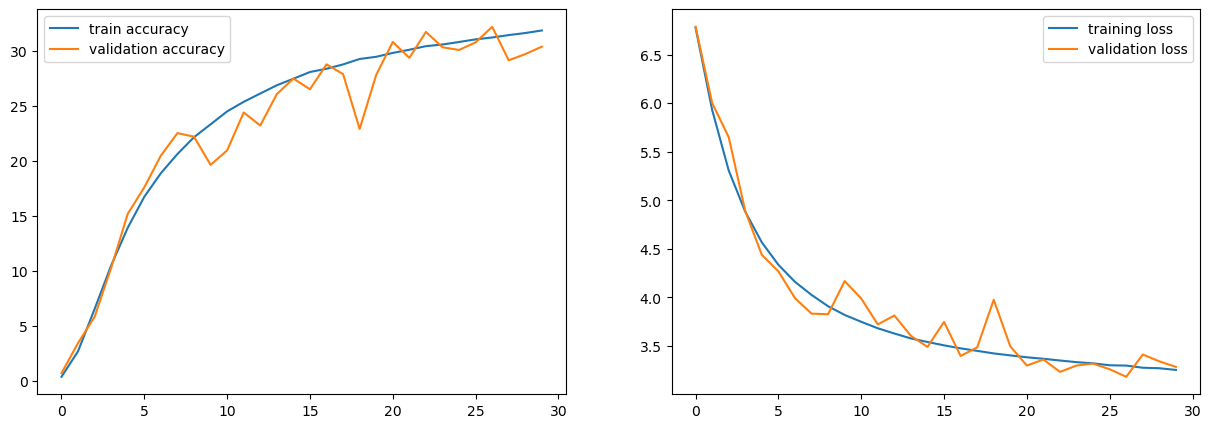

In [50]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
tb_df[(tb_df["phase"]=='train')&(tb_df["metric"]=="Accuracy")].reset_index().plot(ax=ax[0], y="value", label="train accuracy")
tb_df[(tb_df["phase"]=='val')&(tb_df["metric"]=="Accuracy")].reset_index().plot(ax=ax[0], y="value", label="validation accuracy")
tb_df[(tb_df["phase"]=='train')&(tb_df["metric"]=="Loss")].reset_index().plot(ax=ax[1], y="value", label="training loss")
tb_df[(tb_df["phase"]=='val')&(tb_df["metric"]=="Loss")].reset_index().plot(ax=ax[1], y="value", label="validation loss")

In [76]:
import time
import datetime
test = stats["timestamp"].values[0]
def convert_to_msec(date):
    return time.mktime(
            datetime.datetime.strptime(
                date, 
                "%Y-%m-%d %H:%M:%S.%f"
                ).timetuple())
    
stats["timestamp_sec"] = stats["timestamp"].apply(convert_to_msec)
stats["sec"] = stats["timestamp_sec"] - stats["timestamp_sec"].min()
stats["days"] = stats["sec"]/3600/24

tb_df["sec"] = tb_df["value"] - stats["timestamp_sec"].min()
tb_df["days"] = tb_df["sec"]/3600/24

<Axes: xlabel='days'>

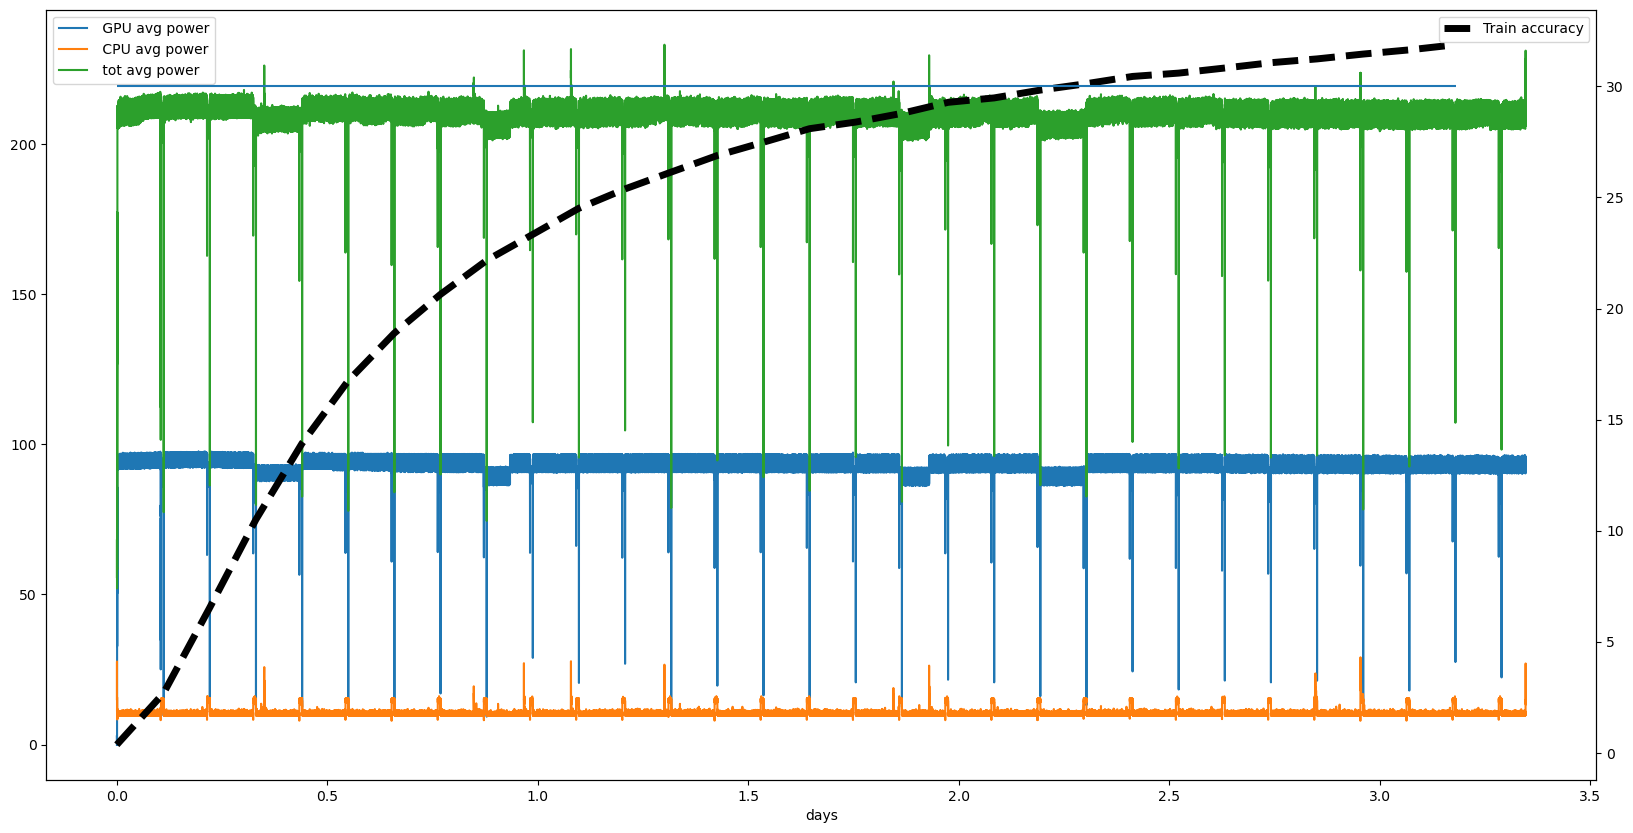

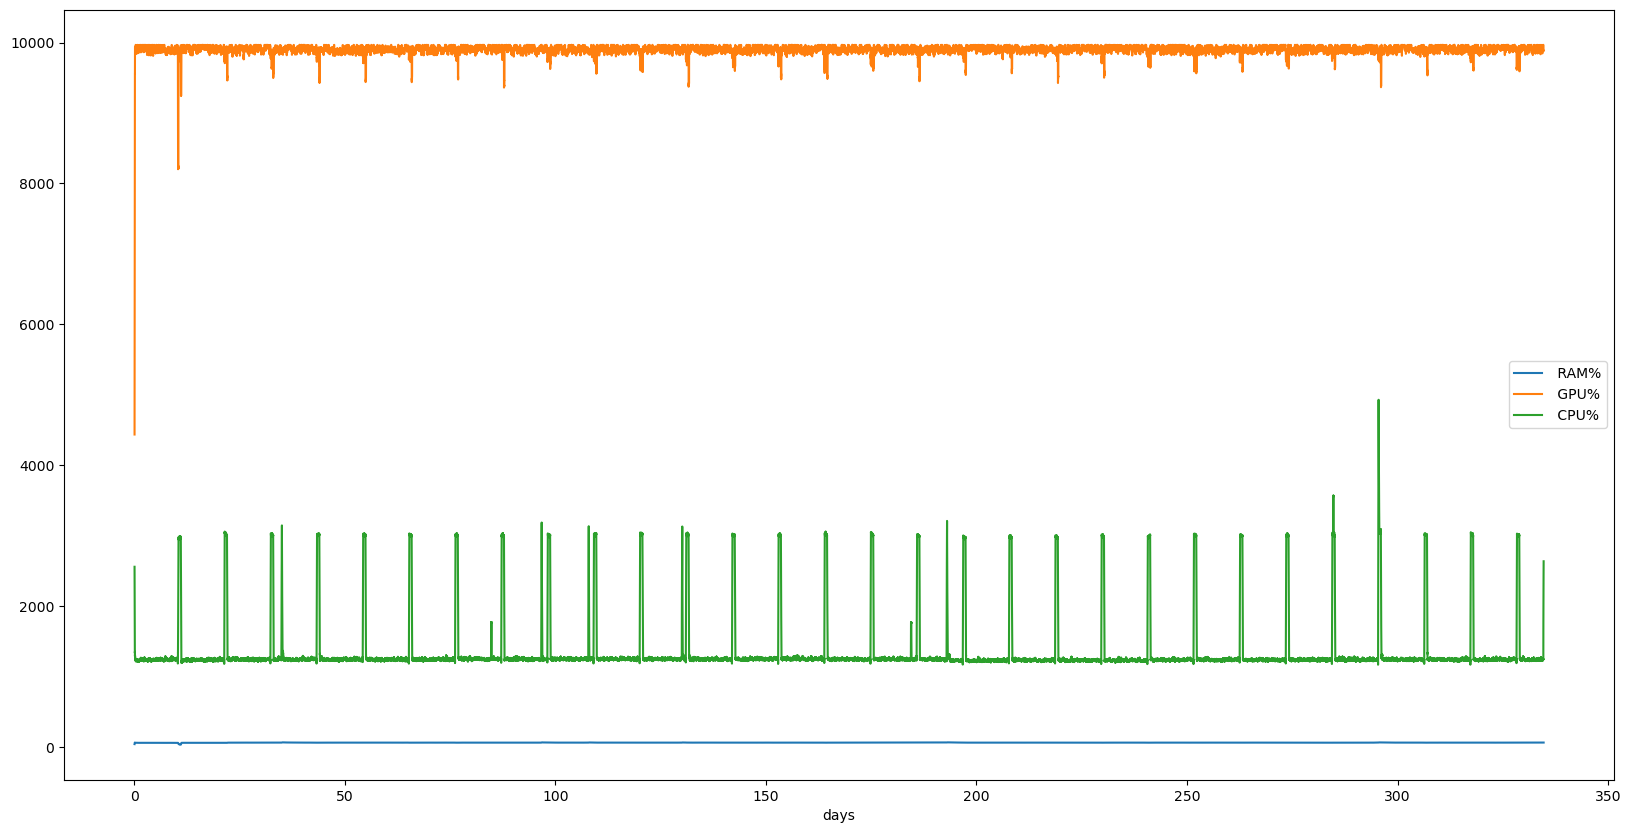

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
stats.plot(ax=ax, x="days", y = [x for x in stats.columns if "power" in x and "avg" in x])
ax2 = ax.twinx()
lesx = tb_df[(tb_df["phase"]=='train')&(tb_df["metric"]=="Timestamp")][:-1].days.values
lesy = tb_df[(tb_df["phase"]=='train')&(tb_df["metric"]=="Accuracy")].value.values
ax2.plot(lesx, lesy, linewidth=5, label="Train accuracy", color="black", linestyle='--')
ax2.legend()
ax2.hlines(y=30, xmin=min(lesx) , xmax=max(lesx))
fig, ax = plt.subplots(figsize=(20,10))
ycols = [x for x in stats.columns if "%" in x]
stats[ycols+["days"]].rolling(100).sum().plot(ax=ax, x="days", y = ycols)

In [87]:
tb_df[(tb_df["phase"]=='train')&(tb_df["metric"]=="Accuracy")&(tb_df["value"]>30)] #.sort_values(by="")

,step,tag,value,metric,phase,timestamp_days,sec,days
21,21,Accuracy/train,30.122858,Accuracy,train,0.000349,-1.690790e+09,-19569.328830
22,22,Accuracy/train,30.448732,Accuracy,train,0.000352,-1.690790e+09,-19569.328826
23,23,Accuracy/train,30.598595,Accuracy,train,0.000354,-1.690790e+09,-19569.328824
24,24,Accuracy/train,30.827682,Accuracy,train,0.000357,-1.690790e+09,-19569.328821
25,25,Accuracy/train,31.067307,Accuracy,train,0.000360,-1.690790e+09,-19569.328819
26,26,Accuracy/train,31.238245,Accuracy,train,0.000362,-1.690790e+09,-19569.328817
27,27,Accuracy/train,31.456015,Accuracy,train,0.000364,-1.690790e+09,-19569.328814
28,28,Accuracy/train,31.644514,Accuracy,train,0.000366,-1.690790e+09,-19569.328812
29,29,Accuracy/train,31.876333,Accuracy,train,0.000369,-1.690790e+09,-19569.328809
